# Assignment-1

### Unit:  FIT-5145
### Submitted to: Yassein Shaalan
### Tutor Session: Tuesdays 4 PM 

### Submitted by: Jashandeep Singh  
### Student ID:  30895014

Reference List

https://matplotlib.org/api/pyplot_api.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html
https://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot
https://matplotlib.org/tutorials/introductory/pyplot.html
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.legend.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isnumeric.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html


# Task A: Exploratory Data Analysis of the Energy Dataset

## A1. Investigating the Energy Generation data for Victoria

##### 1. First, read the data for Victoria state into a dataframe. You will observe that some values for the fuel types (eg. Black coal etc.) are missing or have ‘Nan’. To handle it, replace these values with zero (using appropriate python code) before proceeding with the rest of the questions.

In [1]:
# importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


energy_data_df = pd.read_excel('energy_data.xlsx', sheet_name='VIC')

energy_data_df.fillna(0, inplace=True)  #changing null values as 0



energy_data_df #showing the df


,State,Fuel_Type,Category,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,VIC,Black coal,Non-renewable fuels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.9,36.3,0.0
1,VIC,Brown coal,Non-renewable fuels,52094.0,51541.7,51066.5,52059.7,45317.6,43977.7,48336.8,46202.2,43557.8,36067.0
2,VIC,Natural gas,Non-renewable fuels,1451.9,1697.9,1289.8,1142.5,3247.7,3239.3,2390.9,1892.2,2658.7,3899.4
3,VIC,Oil products,Non-renewable fuels,20.4,1.1,38.2,4.0,10.7,145.8,156.0,70.6,109.3,164.8
4,VIC,Other,Non-renewable fuels,61.1,115.9,114.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,VIC,Biomass,Renewable fuels,292.0,303.4,339.6,859.3,845.1,886.9,672.2,747.7,694.5,661.8
6,VIC,Wind,Renewable fuels,573.0,1406.0,1434.4,1416.2,2005.1,2771.9,3067.8,3341.8,3560.9,4224.2
7,VIC,Hydro,Renewable fuels,557.8,843.7,1118.5,1047.4,940.3,1103.0,1170.9,1207.6,824.8,785.3
8,VIC,Large-scale solar PV,Renewable fuels,0.0,0.0,0.0,0.0,0.0,4.4,9.1,11.5,13.8,39.4
9,VIC,Small-scale solar PV,Renewable fuels,24.1,66.2,205.5,378.7,580.1,674.2,874.8,-1056.1,1231.7,1481.2


###### 1.a. Using Python, plot the total energy generation in Victoria over the time period covered in the dataset (2009 to 2018). Describe the trend you see in the overall energy generation for the given time period.

2009    55074.3
2010    55975.9
2011    55607.0
2012    56907.8
2013    52946.6
2014    52803.2
2015    56678.5
2016    52449.4
2017    52687.8
2018    47323.1
dtype: float64

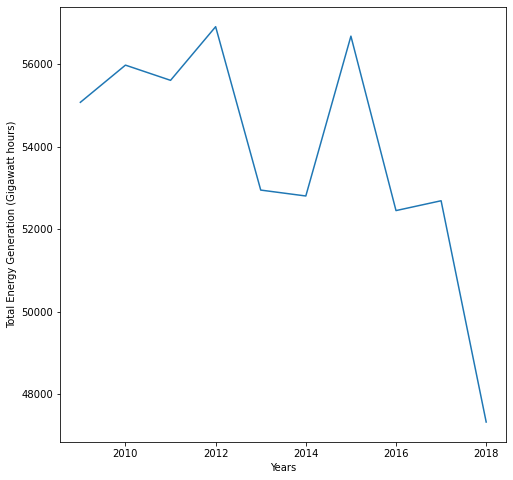

In [2]:
plt.ylabel("Total Energy Generation (Gigawatt hours)") #labeling the axis of the plot
plt.xlabel("Years")

energy_data_df.sum(axis=0 , numeric_only=True).plot(figsize=(8,8)) #Using the parameter numeric_only for filtering numerical values.



energy_data_df.sum(axis=0 , numeric_only=True) #showing the output

###### 1.b. Draw a new plot showing the trend in total renewable and non-renewable energy generation for the same time period? What trend can you observe from this graph?

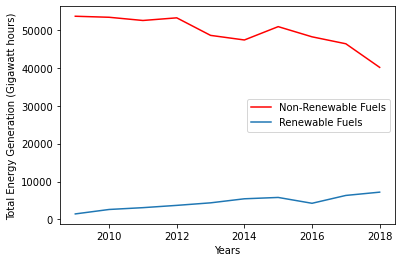

In [3]:
non_renewable_sum = energy_data_df.loc[energy_data_df['Category'] == 'Non-renewable fuels'].sum(axis=0 , numeric_only=True)
renewable_sum = energy_data_df.loc[energy_data_df['Category'] == 'Renewable fuels'].sum(axis=0 , numeric_only=True)

plt.ylabel("Total Energy Generation (Gigawatt hours)") #labeling the axis of the plot
plt.xlabel("Years")

plt.plot(non_renewable_sum,  'r', label="Non-Renewable Fuels") # defining red color to the plot and declaring labels for legend
plt.plot(renewable_sum, label="Renewable Fuels") 
plt.legend() # showing the legend in the plot



###### 1.c. Draw a bar chart showing the breakdown of the different fuel types used for energy generation in 2009 vs in 2018? Explain your observation.
 

,2009,2018
Fuel_Type,,
Black coal,0.0,0.0
Brown coal,52094.0,36067.0
Natural gas,1451.9,3899.4
Oil products,20.4,164.8
Other,61.1,0.0
Biomass,292.0,661.8
Wind,573.0,4224.2
Hydro,557.8,785.3
Large-scale solar PV,0.0,39.4


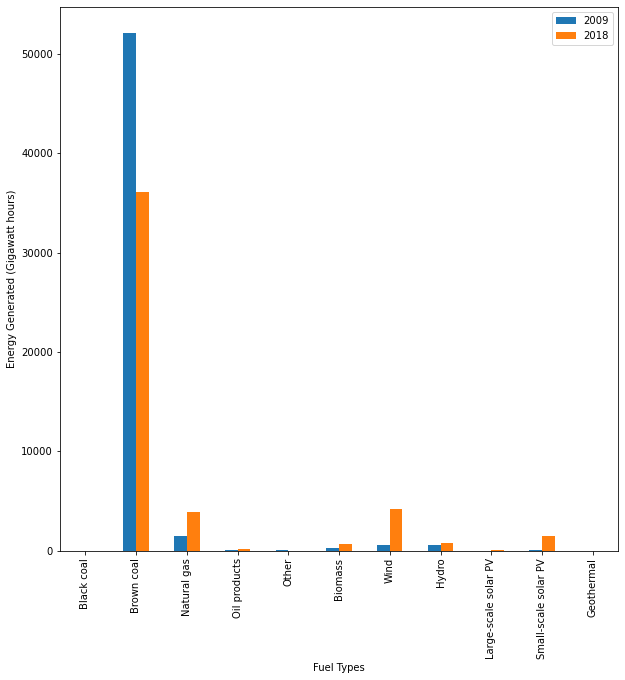

In [4]:

energy_data_df[["Fuel_Type", 2009, 2018]].set_index('Fuel_Type').plot.bar(figsize=(10,10))
plt.xlabel("Fuel Types")
plt.ylabel("Energy Generated (Gigawatt hours)")


energy_data_df[["Fuel_Type", 2009, 2018]].set_index('Fuel_Type') #showing the df

###### 1.d. What was the most used energy resource (fuel-type) in 2015? Which renewable fuel type was the least used in 2015?

Text(0, 0.5, 'Energy Generation (Gigawatt hours)')

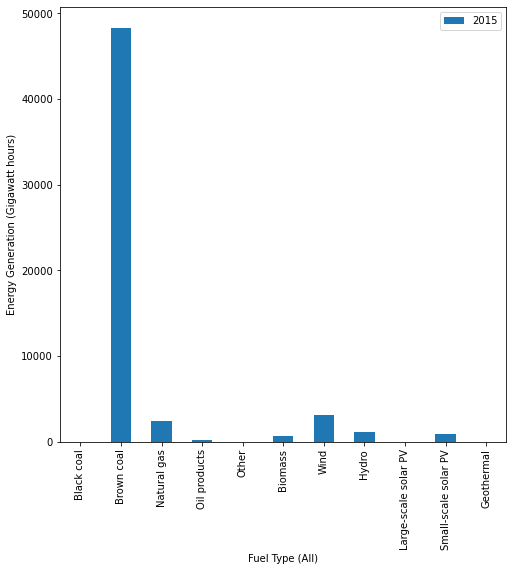

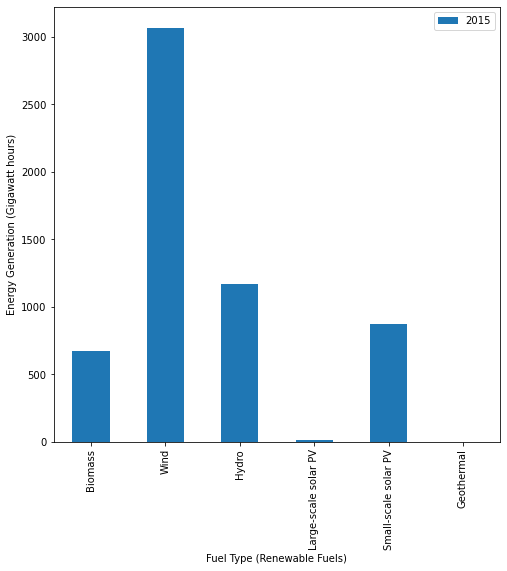

In [5]:

energy_data_df[["Fuel_Type",2015]].set_index('Fuel_Type').plot.bar(figsize=(8,8)) #Selecting index for plotting fuel type and year
plt.xlabel("Fuel Type (All)")
plt.ylabel("Energy Generation (Gigawatt hours)")


x = energy_data_df[energy_data_df.Category == "Renewable fuels"] # defining new dataframe with only Renewable fuels

x[["Fuel_Type",2015]].set_index('Fuel_Type').plot.bar(figsize=(8,8))
plt.xlabel("Fuel Type (Renewable Fuels)")
plt.ylabel("Energy Generation (Gigawatt hours)")



###### 1.e. Draw a plot showing the percentage of Victoria's energy generation coming from Renewable vs Non-Renewable energy sources over the period 2009 to 2018. What can you say about the trend you observe?

,Renewable Energy Sources,Non-renewable Energy Sources
2009,2.627178,97.372822
2010,4.679335,95.320665
2011,5.571241,94.428759
2012,6.504556,93.495444
2013,8.254732,91.745268
2014,10.303163,89.696837
2015,10.223983,89.776017
2016,8.107814,91.892186
2017,12.006005,87.993995
2018,15.197441,84.802559


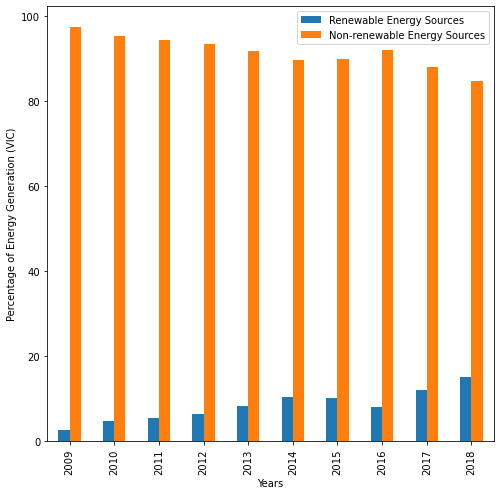

In [6]:
total_energy = non_renewable_sum + renewable_sum    # variables from part A1.1.b. , total_energy defines the total energy produced in that year

df_energy_generation = pd.DataFrame({
                                     "Renewable Energy Sources": (renewable_sum/total_energy)*100,
                                     "Non-renewable Energy Sources": (non_renewable_sum/total_energy)*100,
                                    })    # years are already defined in index for plotting


df_energy_generation.plot.bar(figsize=(8,8)) #changing the size of the plot

plt.xlabel("Years")
plt.ylabel("Percentage of Energy Generation (VIC)")


df_energy_generation # showing the df

###### 1.f. Using a linear regression model, predict what percentage of Victoria’s energy generation will come from Renewable energy sources in the year 2030, 2100? Do the predictions seem reasonable?

Slope is 1.153386 Intercept is -2313.994407


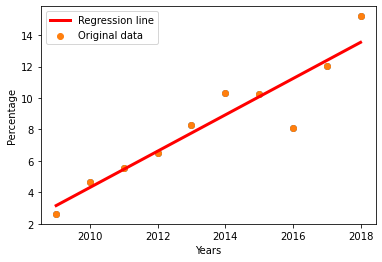

The prediction for year 2030 is: 27.378408 percent
The prediction for year 2100 is: 108.115401 percent


,Years,Percentage
0,2009,2.627178
1,2010,4.679335
2,2011,5.571241
3,2012,6.504556
4,2013,8.254732
5,2014,10.303163
6,2015,10.223983
7,2016,8.107814
8,2017,12.006005
9,2018,15.197441


In [7]:
percentage_renewable_sum  = (renewable_sum/total_energy)*100   # variables from A1.1.e

# converting series to dataframe 
df_percentage = percentage_renewable_sum.to_frame().reset_index()


df_percentage.columns = ["Years", "Percentage"]

df_percentage.set_index("Years")





plt.scatter(df_percentage["Years"] ,df_percentage["Percentage"] )
plt.ylabel("Percentage")
plt.xlabel("Years")



# linear regression model 

from scipy import stats 

from scipy.stats import linregress


# linregress() will help us determine slope and intercept of the function. 

slope, intercept, r_value, p_value, std_err = linregress(df_percentage["Years"] ,df_percentage["Percentage"] )

print("Slope is %f" %slope , "Intercept is %f" %intercept)

line = [slope*xi + intercept for xi in df_percentage["Years"]]   # y = mx+c, determining the regression line on current data 

plt.plot(df_percentage["Years"],line,'r-', linewidth=3 , label="Regression line")
plt.scatter(df_percentage["Years"] ,df_percentage["Percentage"] ,label="Original data" )
plt.legend()
plt.show()

# generating prediction values by using y = mx+c, where x is Years, m is the slope, c is the intercept. 

# for year 2030
x_predict = 2030
y_predict = slope * x_predict + intercept 

print("The prediction for year 2030 is: %f percent"  %y_predict)

#for year 2100
x_predict = 2100
y_predict = slope * x_predict + intercept 
print("The prediction for year 2100 is: %f percent"  %y_predict)


df_percentage # showing the df


## A2. Investigating the Energy Generation data for Australia.

###### 1. Let’s do some further investigation by combining the data for all the states and territories in Australia. Read the data for the rest of the states and merge them in a single dataframe. (Hint: you can use a combination of merge, melt or concat operators to get your data in a format suitable for answering the following questions)

In [8]:
all_energy_data_df = pd.concat(pd.read_excel("energy_data.xlsx", sheet_name=None), ignore_index=True)

all_energy_data_df.fillna(0, inplace=True)  #changing null values as 0, for easier auditing

all_energy_data_df # showing the df


,State,Fuel_Type,Category,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,VIC,Black coal,Non-renewable fuels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.9,36.3,0.0
1,VIC,Brown coal,Non-renewable fuels,52094.0,51541.7,51066.5,52059.7,45317.6,43977.7,48336.8,46202.2,43557.8,36067.0
2,VIC,Natural gas,Non-renewable fuels,1451.9,1697.9,1289.8,1142.5,3247.7,3239.3,2390.9,1892.2,2658.7,3899.4
3,VIC,Oil products,Non-renewable fuels,20.4,1.1,38.2,4.0,10.7,145.8,156.0,70.6,109.3,164.8
4,VIC,Other,Non-renewable fuels,61.1,115.9,114.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,WA,Wind,Renewable fuels,675.1,664.0,719.3,1278.7,1300.2,1578.8,1643.2,1476.5,1616.7,1593.0
73,WA,Hydro,Renewable fuels,0.0,0.0,0.0,0.0,221.3,205.4,206.1,217.0,212.6,217.9
74,WA,Large-scale solar PV,Renewable fuels,0.0,0.0,0.0,0.0,0.0,24.1,23.9,28.3,34.3,45.6
75,WA,Small-scale solar PV,Renewable fuels,18.7,57.5,198.1,331.4,449.5,495.8,622.1,760.8,941.1,1196.4


###### 1.a. Plot a column chart showing the total energy generated in Australia by fuel type in the year 2018.


,2018
Fuel_Type,
Biomass,3534.1
Black coal,121592.6
Brown coal,36067.0
Geothermal,0.0
Hydro,15838.9
Large-scale solar PV,1007.6
Natural gas,53839.4
Oil products,5262.6
Other,0.0


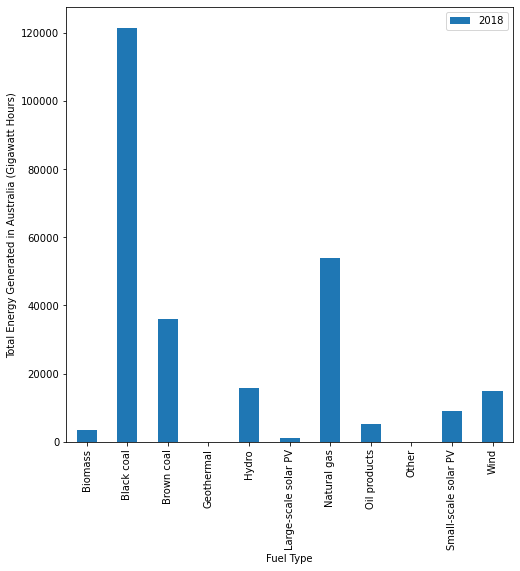

In [9]:
f = all_energy_data_df[["Fuel_Type", 2018]]


f.groupby("Fuel_Type").sum().plot.bar(figsize = (8,8)) # Total energy generated 
plt.xlabel("Fuel Type")
plt.ylabel("Total Energy Generated in Australia (Gigawatt Hours)")

f.groupby("Fuel_Type").sum() # showing the data

###### 1.b. Which state had the highest energy production in 2018? What is the ratio (percentage breakdown) of renewable vs non-renewable energy production for that state in 2018.

2018    NSW
dtype: object


,Renewable Energy Production Percentage,Non-renewable Energy Production Percentage
2018,15.660312,84.339688


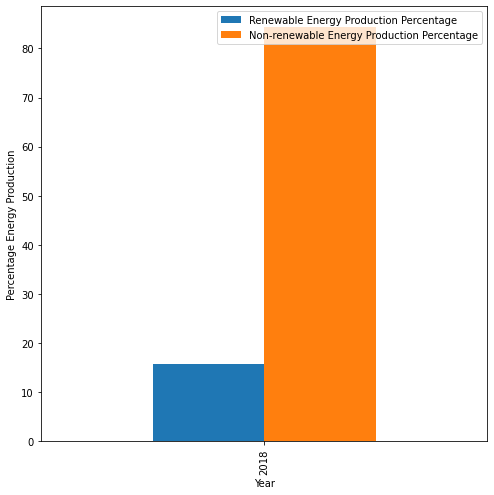

In [10]:
g = all_energy_data_df[["State", "Fuel_Type", 2018]]

total_state_energy = g.groupby("State").sum() #State is the index of the df

max_state = total_state_energy[[2018]].idxmax() #returns the Name for the state with highest energy production
print(max_state)

# NSW is the State with highest energy production. 

df_NSW = all_energy_data_df.loc[all_energy_data_df["State"]== "NSW"].reset_index()
df_NSW_energy = df_NSW[["Fuel_Type", "Category", 2018]]
df_NSW_energy # df of NSW for year 2018

NSW_renewable_sum = df_NSW_energy.loc[df_NSW_energy["Category"] == "Renewable fuels"].sum(axis=0 , numeric_only=True)
NSW_non_renewable_sum = df_NSW_energy.loc[df_NSW_energy["Category"] == "Non-renewable fuels"].sum(axis=0 , numeric_only=True)
NSW_total_sum = NSW_renewable_sum + NSW_non_renewable_sum 

NSW_energy_breakdown = pd.DataFrame({ "Renewable Energy Production Percentage" : (NSW_renewable_sum/NSW_total_sum)*100,
                                    "Non-renewable Energy Production Percentage" :(NSW_non_renewable_sum/NSW_total_sum)*100 
                                    })  # the dataframe consists of the percentage values



NSW_energy_breakdown.plot.bar(figsize = (8,8))
plt.xlabel("Year")
plt.ylabel("Percentage Energy Production")


NSW_energy_breakdown # showing the df


###### 1.c. Draw a plot showing the percentage of energy generation from renewable energy sources for each state over the period 2009 to 2018. From your graph, which state do you think is making the most progress towards adopting green energy? Provide a reason for your answer.

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
State,,,,,,,,,,
NSW,5.278109,6.771295,9.536412,8.447289,11.630281,10.177022,10.574166,14.231296,16.037979,15.660312
NT,0.331919,0.413274,0.462648,0.552802,0.706010,0.963675,1.478145,1.911347,2.921807,3.513067
QLD,3.884591,3.476066,3.606199,4.140304,5.207971,6.292163,6.044747,6.463106,6.497393,7.151522
SA,14.424195,15.350651,21.855236,26.845457,29.485390,37.472847,39.854294,41.250526,46.962737,46.633725
TAS,91.045922,88.180493,86.172198,84.712464,86.347701,92.823264,98.443535,90.832721,91.329115,91.312427
VIC,2.627178,4.679335,5.571241,6.504556,8.254732,10.303163,10.223983,8.107814,12.006005,15.197441
WA,2.933825,2.920728,3.221948,5.373827,6.133248,6.619774,6.940360,6.653088,7.462474,7.744543


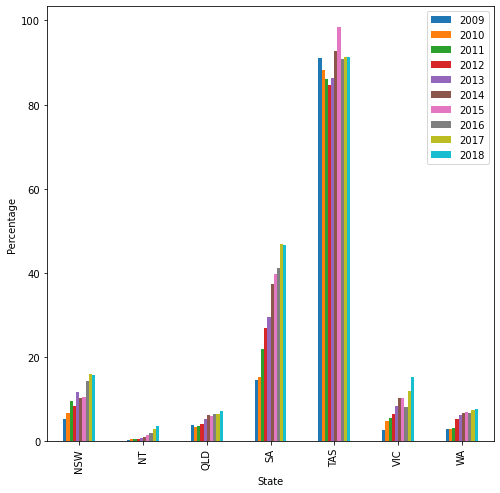

In [11]:
# df with total energy generation 
total_energy = all_energy_data_df.groupby("State").sum()



# new df with total renewable fuel energy generation 
x = all_energy_data_df.groupby(["State", "Category"]).sum()
y = x.reset_index() # to reset the index from State and Category 
p = y.loc[y.Category == "Renewable fuels"] #filtering the Renewable fuels 
# formatting and setting index as "State"
del p["Category"]
total_energy_renewable = p.set_index("State")

# Calculating the percentage of energy generation from renewable energy sources for each state over the period 2009 to 2018
l = total_energy_renewable.div(total_energy)*100
l.plot.bar(figsize = (8,8))
plt.xlabel("State")
plt.ylabel("Percentage")

l # showing the df




## A3. Visualising the Relationship over Time


###### Now let's look at the relationship between all variables impacting the energy generation over time. Ensure that you have combined all the data from the different states. Ensure that your data is aggregated by year, state, the total energy produced (total_production), and has a separate column for each of the fuel types.

###### 1. Use Python to build a Motion Chart, that visualises the energy production trend for Australia over time. The motion chart should show the units of energy production using Wind on the x-axis, the energy production using Natural gas on the y-axis, the colour represents the states/territories the bubble size should show the total_production.

In [12]:

from motionchart.motionchart import MotionChart # importing for motionchart 

d = all_energy_data_df.drop(["Category"], axis=1)
d_1 = d.melt(id_vars = ["State", "Fuel_Type"], var_name = ["Years"], value_name = "Year_Value")

d_1.set_index("Years", "State")
d_chart= d_1.pivot_table("Year_Value", ["Years", "State"], "Fuel_Type").reset_index().set_index("Years", "State")

d_chart.loc[:, "total_production"] = d_chart.sum(axis=1, numeric_only = True) #https://stackoverflow.com/questions/53414960/how-do-i-create-a-sum-row-and-sum-column-in-pandas. , retrieved 28th April, 2020

d_chart.reset_index(inplace=True)
d_chart.columns.name = None

d_chart # showing the df

ModuleNotFoundError: No module named 'motionchart'

In [ ]:

# html code block for clean visual output of motion chart 
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
 
# defining variables of motionchart 
mChart = MotionChart(df = d_chart, key='Years', x='Wind', y='Natural gas', xscale='linear', yscale='linear',
                     size='total_production', color='State', category='State')

mChart.to_notebook() # motion chart display 


###### 2. Run the visualisation from start to end. (Hint: In Python, to speed up the animation, set the timer bar next to the play/pause button to the minimum value.) And then answer the following questions:

###### 2.b. Which state relied most on natural gas for energy production in 2013? Please support your answer with any relevant python code and the motion chart screenshot.


In [ ]:
d_chart[["Years","State","Natural gas"]].loc[d_chart.Years == 2013].max() #max value for year 2013


# Task B : Exploratory Analysis of Data
## B1. Investigating the Data

###### Please make sure to understand the data set and it’s variables properly before answering the following questions. You need to have a good insight into the dataset to be able to understand some of the questions properly and avoid confusion.

###### 1. How many tweets are there all together in the data file? How many of these tweets were posted from a verified account?

In [ ]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline # for better plot visualisation


twitter_df = pd.read_csv("twitter_data.csv") #reading the csv into pandas

In [ ]:



total_tweets = len(twitter_df.index) # no. of rows in the dataset are the tweets. 

print("The total number of tweets in the data file is: %f" %total_tweets)

total_tweets_verified = len(twitter_df.loc[twitter_df.isVerified == 1]) # value entry 1 denoted as yes in dataset. 

print("The total number of tweets posted from a verified account in the data file is: %f " %total_tweets_verified)



###### 2. Draw a histogram showing the distribution of #entities extracted from the tweets. Set an appropriate bin size to present this information.

In [ ]:
twitter_hist = twitter_df[["#entities"]]
twitter_hist.plot.hist(figsize= (8,8), bins=11, edgecolor= "black") #setting bins = 11 
plt.ylabel("Frequency of #entities extracted from tweets")
plt.xlim(0,11) # maximum number of entities is 11. 


###### 3. Compute the descriptive statistics (mean, std, quartile1, median, quartile3 and max ) of #entities of relevant (ie. relevanceJudge = 1) and non-relevant (ie. with relevanceJudge = 0) tweets in the dataset. (Hint: You may use the describe() function for simplicity). Explain any interesting findings.

In [ ]:
d_stats = twitter_df[["#entities", "relevanceJudge"]]

# #entities of relevant
d_stats_rel = d_stats.loc[d_stats.relevanceJudge == 1].describe()


# #entities of non-relevant 
d_stats_non_rel = d_stats.loc[d_stats.relevanceJudge == 0].describe()

print(d_stats_rel)
print(d_stats_non_rel)

###### 4. What is the average length of the tweets (in characters) that are judged as relevant? What is the average length of a non-relevant tweet?

In [ ]:
avg_len_df = twitter_df[["length", "relevanceJudge"]]

avg_len_rel = avg_len_df.loc[avg_len_df.relevanceJudge == 1].mean().drop(["relevanceJudge"])

avg_len_non_rel = avg_len_df.loc[avg_len_df.relevanceJudge == 0].mean().drop(["relevanceJudge"])

print("The average length of relevant tweets is: %f " %avg_len_rel)
print("The average length of the non-relevant tweets is: %f " %avg_len_non_rel )


###### 5. To gain further insights into the twitter age of the users, it would be better to group the twitterAge in categorical bins. Create a new column twitter age group in your dataframe based on twitterAge by converting it into the following groupings or categories [‘0-1’,’1-2’,’2-3’,’3-4’, ‘4-5’, ‘5+’]  (Hint: You can use the cut() method to bin (categorise) your data in these suggested categories)

In [ ]:


twitter_df["age_group"] = pd.cut(twitter_df.twitterAge, bins=[0,1,2,3,4,5,6], labels=["0-1","1-2","2-3","3-4", "4-5", "5+"])

twitter_df.age_group.fillna("0-1", inplace=True) # formatting data set to remove null values for the category 0-1

twitter_df # to show the df



###### 5.a. Generate boxplots summarising the distribution of each twitter age group against their median tweet length. What do you observe? Is there much variation in tweet length across the age groups?

In [ ]:
twitter_5a = twitter_df[["length", "age_group"]].sort_values(by=["age_group"], ascending=True).groupby("age_group")
twitter_5a.boxplot(column='length', by='age_group', figsize=(8,8), rot=45, fontsize=9) # box plot is grouped by "age_group"
plt.ylabel("Median Value ")


###### 5.b. Which age group has the lowest median tweet length and which one has the highest? State these median values.

In [ ]:
twitter_5b = twitter_5a.median().reset_index() #twitter_5a is the variable from part 5.a
twitter_5b # to show the data

###### 5.c. According to the current bushfire tweet dataset, which age group is more active on twitter(has posted most tweets - from the current processed set tweets in your dataframe)? (Note: Each record in the dataframe is a tweet).

In [ ]:
twitter_5c = twitter_df[["age_group"]].reset_index().groupby("age_group").count().reset_index()
twitter_5c.rename(columns={"index":"Total_tweets"}, inplace=True)
twitter_5c.iloc[twitter_5c["Total_tweets"].idxmax()] #https://community.dataquest.io/t/pandas-return-row-with-the-maximum-value-of-a-column/258474, retrieved 30th April 2020

twitter_5c # to show the df


###### 5.d. Create a plot showing the total number of tweets posted by each age group (from Part [c] above).


In [ ]:
twitter_5c.set_index("age_group").plot.bar(figsize=(8,8)) # df from part 5.c
plt.xlabel("Age Group")
plt.ylabel("Number of Tweets")
plt.ylim(0,18000)
twitter_5c # to show th df

###### 5.e. Which age group on average has the highest number of followers on twitter?

In [ ]:
twitter_5e = twitter_df[["age_group", "nFollowers"]].groupby("age_group").mean().reset_index()#avergae number of followers 
twitter_5e.rename(columns={"nFollowers":"avg_followers" }, inplace=True) #renaming column 
twitter_5e.iloc[twitter_5e["avg_followers"].idxmax()] #fetching the highest avg follower count for age_group 

twitter_5e # to show the df

## B2. Exploring correlation in the Data

###### In this task, you are required to explore the above (twitter) dataset and report on any interesting relationship/correlations you discover amongst the tweet variables. Your analysis should form a logical story. The answer should contain visualisations (plots to represent the trend or correlation), interpretation of your findings and an example of a prediction task (using simple linear regression). [Note: There should be a clear reason behind each visualisation you create, followed by a concise explanation of what message the visualisation is conveying.]

######  1. Relation between the trend of "isGeoEnabled".

In [ ]:

twitter_b2_1 = twitter_df[["isGeoEnabled"]]

relation_geo_location = pd.DataFrame({"Total Non Geo Enabled Tweets " : twitter_b2_1.loc[twitter_b2_1.isGeoEnabled ==1].count(),
                                      "Total Geo Enabled Tweets" : twitter_b2_1.loc[twitter_b2_1.isGeoEnabled ==0].count()})

relation_geo_location.plot.bar(figsize=(8,8))

plt.ylabel("Total tweets")

relation_geo_location # to show the df



###### 2. Relation between relevance factor of a tweet to the topic (bushfires) posted by a verified and a non-verified account

In [ ]:

twitter_b2_2 = twitter_df[["isVerified", "relevanceJudge"]]

relevance_factor_tweet = pd.DataFrame({"index": ("Verified Account","Non Verified Account"),
                                       "Relevant Tweets" : (twitter_b2_2.loc[twitter_b2_2.isVerified==1].relevanceJudge.sum() , twitter_b2_2.loc[twitter_b2_2.isVerified==0].relevanceJudge.sum()), 
                                       "Non relevant Tweets" : (twitter_b2_2.loc[(twitter_b2_2["isVerified"] ==1) & (twitter_b2_2["relevanceJudge"]==0)].isVerified.count(),twitter_b2_2.loc[(twitter_b2_2["isVerified"] ==0) & (twitter_b2_2["relevanceJudge"]==0)].isVerified.count()),
                                        })
relevance_factor_tweet["relevance factor"] = (relevance_factor_tweet["Relevant Tweets"]/relevance_factor_tweet["Non relevant Tweets"]) # div between relevant and non relevant tweets 

plt_rel = relevance_factor_tweet.set_index("index")
plt_rel["relevance factor"].plot.bar()
plt.xlabel("Account Type")
plt.ylabel("Relevance Factor")



plt_rel # to show the data


